In [51]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: Candy Valentina López Villanueva

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [52]:
# Aqui va su código
# a. Defina una función llamada derivada que encuentre el valor de la derivada en 𝑥=2 usando diferencias finitas centrales

def derivada(f, x, tol=1e-8):
    '''
    Calcula la derivada de una función f en un punto x usando
    el método de diferencias finitas centrales.

    La aproximación se realiza refinando h hasta que el cambio en la derivada
    entre iteraciones consecutivas sea menor a la tolerancia especificada.

    Parámetros:
    f : función
        Función que se va a derivar.
    x : float
        Punto en el que se evalúa la derivada.
    tol : float, opcional
        Tolerancia para detener el refinamiento de h, en este caso es 1e-8.

    Retorna:
    derivadas : lista de float
        Lista de valores de la derivada estimada en cada paso.
    h_valores : lista de float
        Valores correspondientes de h usados para cada derivada.
    '''
    h = 0.1
    derivadas = []
    h_valores = []

    derivada_anterior = (f(x + h) - f(x - h)) / (2 * h)
    derivadas.append(derivada_anterior)
    h_valores.append(h)

    while True:
        h /= 2
        derivada_nueva = (f(x + h) - f(x - h)) / (2 * h)
        derivadas.append(derivada_nueva)
        h_valores.append(h)

        if abs(derivada_nueva - derivada_anterior) < tol:
            break

        derivada_anterior = derivada_nueva

    return derivadas, h_valores

In [53]:
# Implementación de la función derivada

# Función a derivar
f = lambda x: 3**x

# Valor exacto de la derivada de f(x) = 3^x es: f'(x) = 3^x * ln(3)
valor_real = 3**2 * np.log(3)

# Ejecutamos la función
derivadas, h_valores = derivada(f, x=2)

# Mostramos los resultados
print("Resultados de la derivación numérica en x=2:")
print(f"Derivada exacta: {valor_real:.10f}\n")
print(f"{'h':>12} | {'Derivada':>15} | {'Error absoluto':>15}")
print("-" * 46)
for h, d in zip(h_valores, derivadas):
    error = abs(d - valor_real)
    print(f"{h:12.10f} | {d:15.10f} | {error:15.10f}")

Resultados de la derivación numérica en x=2:
Derivada exacta: 9.8875105980

           h |        Derivada |  Error absoluto
----------------------------------------------
0.1000000000 |    9.9074121387 |    0.0199015407
0.0500000000 |    9.8924837318 |    0.0049731338
0.0250000000 |    9.8887537408 |    0.0012431428
0.0125000000 |    9.8878213749 |    0.0003107769
0.0062500000 |    9.8875882917 |    0.0000776937
0.0031250000 |    9.8875300214 |    0.0000194234
0.0015625000 |    9.8875154539 |    0.0000048558
0.0007812500 |    9.8875118120 |    0.0000012140
0.0003906250 |    9.8875109015 |    0.0000003035
0.0001953125 |    9.8875106739 |    0.0000000759
0.0000976563 |    9.8875106170 |    0.0000000190
0.0000488281 |    9.8875106028 |    0.0000000048
0.0000244141 |    9.8875105992 |    0.0000000012


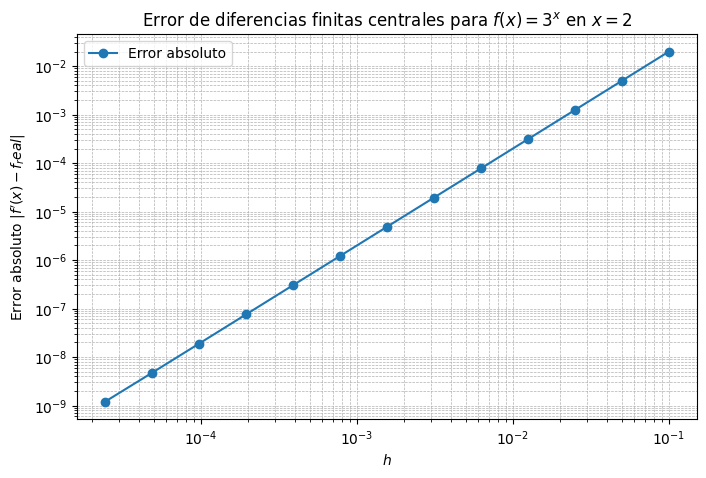

In [54]:
# b. Realice un gráfico logaritmico del error asociado a 𝑓′(𝑥) absoluto en función de ℎ

# Definimos la función f(x) = 3^x
f = lambda x: 3**x

# Valor real de la derivada en x = 2
f_real = 3**2 * np.log(3)

# Calculamos derivadas numéricas
derivadas, h_valores = derivada(f, 2)

# Calculamos error absoluto
errores = [abs(d - f_real) for d in derivadas]

# Gráfico log-log del error
plt.figure(figsize=(8, 5))
plt.loglog(h_valores, errores, marker='o', label='Error absoluto')
plt.xlabel('$h$')
plt.ylabel('Error absoluto $|f\'(x) - f_real|$')
plt.title('Error de diferencias finitas centrales para $f(x)=3^x$ en $x=2$')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



In [55]:
# Aquí va su código

# a. Encuentre una expresión para el polinomio interpolador de Lagrange para 𝑇(𝑥)
def interpolacion_lagrange(x_datos, T_datos):
    '''
    Genera el polinomio interpolador de Lagrange para los datos de temperatura.

    Parámetros:
    x_datos : array
        Arreglo de posiciones x donde se conoce T(x).
    T_datos : array
        Arreglo de temperaturas correspondientes a x_datos.

    Retorna:
    polinomio : Polinomio interpolador de Lagrange.
    '''
    return lagrange(x_datos, T_datos)

In [56]:
# b. Usando la función obtenida por Lagrange y haciendo CubicSpline, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.
def graficar_interpolaciones(x_datos, T_datos):
    '''
    Compara los métodos de Lagrange y CubicSpline interpolando los datos
    y graficando los resultados junto a los datos reales.

    Parámetros:
    x_datos : array
        Arreglo de posiciones x.
    T_datos : array
        Arreglo de temperaturas T(x).
    '''
    x_fina = np.linspace(0, 1, 500)

    # Interpolaciones
    lagrange_poly = interpolacion_lagrange(x_datos, T_datos)
    spline = CubicSpline(x_datos, T_datos)

    # Evaluaciones
    T_lagrange = lagrange_poly(x_fina)
    T_spline = spline(x_fina)

    # Gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(x_datos, T_datos, 'ro', label='Datos experimentales')
    plt.plot(x_fina, T_lagrange, 'b--', label='Interpolación Lagrange')
    plt.plot(x_fina, T_spline, 'g-', label='Cubic Spline')
    plt.xlabel('$x (m)$')
    plt.ylabel('$T(x) (°C)$')
    plt.title('Comparación de Interpolaciones de Temperatura')
    plt.grid(True)
    plt.legend()
    plt.show()

In [57]:
# c. Calcule el gradiente térmico  𝑑𝑇𝑑𝑥  usando los datos procedentes de interpolación CubicSpline. Use np.gradient con ℎ=10−4.
def gradiente_cubic_spline(x_datos, T_datos, h=1e-4):
    '''
    Calcula el gradiente térmico dT/dx usando interpolación CubicSpline y diferencias.

    Parámetros:
    x_datos : array
        Posiciones x medidas.
    T_datos : array
        Temperaturas T(x) correspondientes.
    h : float
        Paso usado para derivar numéricamente.

    Retorna:
    x : ndarray
        Puntos donde se evaluó el gradiente.
    dTdx : ndarray
        Gradiente térmico dT/dx.
    '''
    x = np.arange(0, 1 + h, h)
    spline = CubicSpline(x_datos, T_datos)
    T_interp = spline(x)
    dTdx = np.gradient(T_interp, h)
    return x, dTdx

In [58]:
# d. Determinar el flujo de calor 𝑞(𝑥)=−𝑘𝑑𝑇𝑑𝑥 con 𝑘=401 W/m·K (cobre) y grafique para 𝑥∈[0,1] .
def flujo_calor(x, dTdx, k=401):
    '''
    Calcula y grafica el flujo de calor q(x) = -k * dT/dx

    Parámetros:
    x : array
        Puntos x donde se conoce el gradiente.
    dTdx : array
        Gradiente térmico correspondiente a x.
    k : float
        Conductividad térmica del material (W/m·K), en este caso cobre.
    '''
    q = -k * dTdx

    plt.figure(figsize=(8, 5))
    plt.plot(x, q, label='Flujo de calor q(x)', color='orange')
    plt.xlabel('$x (m)$')
    plt.ylabel('$q(x) [W/m²]$')
    plt.title('Flujo de calor a lo largo de la barra')
    plt.grid(True)
    plt.legend()
    plt.show()

    return q

Polinomio de Lagrange para T(x):
       5       4         3         2
195.3 x - 474 x + 419.3 x - 222.3 x - 8.333 x + 100


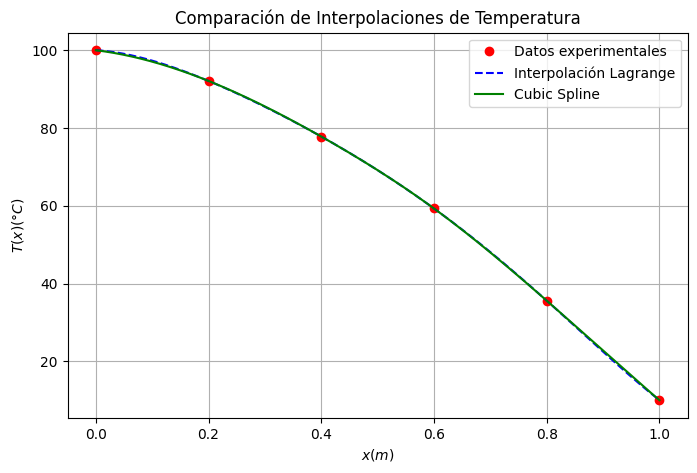


Gradiente térmico dT/dx en puntos seleccionados:
x = 0.00 m, dT/dx ≈ -17.9455 °C/m
x = 0.25 m, dT/dx ≈ -65.7615 °C/m
x = 0.50 m, dT/dx ≈ -91.7708 °C/m
x = 0.75 m, dT/dx ≈ -124.0302 °C/m
x = 1.00 m, dT/dx ≈ -124.9868 °C/m


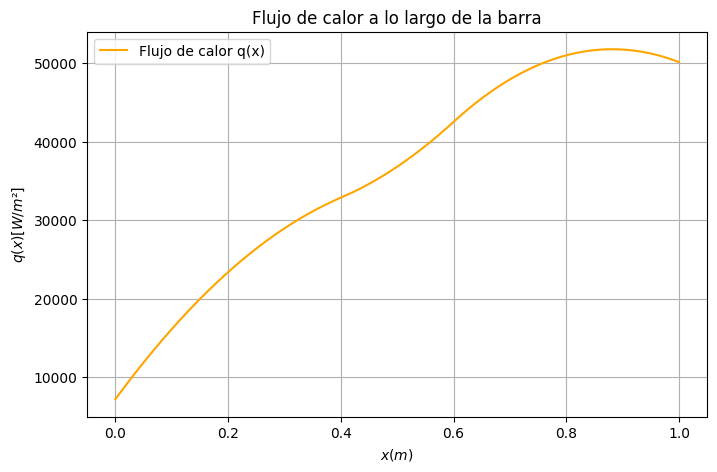

In [59]:
# Resultados

# Datos del ejercicio
x_datos = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
T_datos = np.array([100.0, 92.1, 77.8, 59.3, 35.6, 10.0])

# Parte a
lagrange_poly = interpolacion_lagrange(x_datos, T_datos)
print("Polinomio de Lagrange para T(x):")
print(lagrange_poly)

# Parte b
graficar_interpolaciones(x_datos, T_datos)

# Parte c
x_grad, dTdx = gradiente_cubic_spline(x_datos, T_datos)

# Parte c
print("\nGradiente térmico dT/dx en puntos seleccionados:")
puntos_interes = [0.0, 0.25, 0.5, 0.75, 1.0]

for xi in puntos_interes:
    idx = np.abs(x_grad - xi).argmin()  # encontrar el índice más cercano a xi
    print(f"x = {x_grad[idx]:.2f} m, dT/dx ≈ {dTdx[idx]:.4f} °C/m")

# Parte d
q = flujo_calor(x_grad, dTdx)

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [60]:
# Aquí va su código
# a. Cálculo de la masa total del sistema (usando quad de forma iterativa)

def masa_iterativa():
    '''
    Calcula la masa de la lámina triangular usando integración iterada con quad.
    '''
    def integrando(y, x):
        return x * y

    def integral_interior(x):
        return quad(integrando, 0, 3 - x, args=(x,))[0]

    masa = quad(integral_interior, 0, 3)[0]
    return masa

In [61]:
# a. Cálculo de la masa total del sistema (usando dblquad)

def masa_dblquad():
    '''
    Calcula la masa total usando dblquad directamente.
    '''
    rho = lambda x, y: x * y
    return dblquad(rho, 0, 3, lambda x: 0, lambda x: 3 - x)[0]

In [62]:
# b. Centro de masa de la lámina

def centro_masa(masa):
    '''
    Calcula el centro de masa de la lámina usando integración doble (dblquad).

    Parámetro:
    masa : float
        Masa total de la lámina.

    Retorna:
    (x_barra, y_barra) : tupla
        Coordenadas del centro de masa.
    '''
    integrando_x = lambda x, y: x**2 * y
    integrando_y = lambda x, y: x * y**2

    M_y = dblquad(integrando_x, 0, 3, lambda x: 0, lambda x: 3 - x)[0]
    M_x = dblquad(integrando_y, 0, 3, lambda x: 0, lambda x: 3 - x)[0]

    x_barra = M_y / masa
    y_barra = M_x / masa

    return x_barra, y_barra

In [63]:
# c. Cálculo del momento de inercia respecto al eje 𝑥
def momento_inercia_x():
    '''
    Calcula el momento de inercia respecto al eje x.
    '''
    integrando = lambda x, y: x * y**3
    Ix = dblquad(integrando, 0, 3, lambda x: 0, lambda x: 3 - x)[0]
    return Ix

In [64]:
# Resultados

# Parte a: Masa
m1 = masa_iterativa()
m2 = masa_dblquad()
print(f"Masa (iterativa con quad): {m1:.6f}")
print(f"Masa (con dblquad):       {m2:.6f}")

# Parte b: Centro de masa
x_barra, y_barra = centro_masa(m1)
print(f"\nCentro de masa:")
print(f"x̄ = {x_barra:.6f}, ȳ = {y_barra:.6f}")

# Parte c: Momento de inercia respecto al eje x
Ix = momento_inercia_x()
print(f"\nMomento de inercia respecto al eje x: Iₓ = {Ix:.6f}")

Masa (iterativa con quad): 3.375000
Masa (con dblquad):       3.375000

Centro de masa:
x̄ = 1.200000, ȳ = 1.200000

Momento de inercia respecto al eje x: Iₓ = 6.075000
